In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#  Load The Data

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# About Dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Descriptive Statistics and Visualization

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Boxplot of Median value of owner-occupied homes

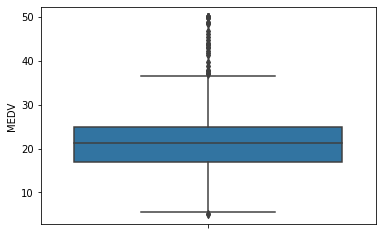

In [5]:
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title('Median Value of Owner-Occupied Homes')
ax.set_xlabel('Tracts Bounding Charles River')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Median Value in $1,000s');


# Histogram of Variable Charless River Variable

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

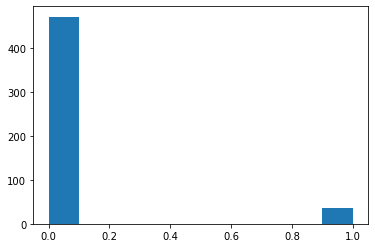

In [6]:
plt.hist(boston_df['CHAS'])

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

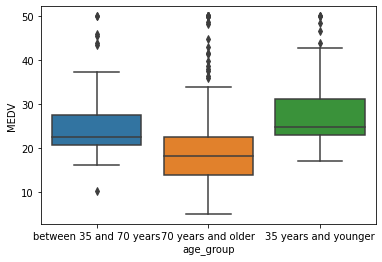

In [8]:
ax = sns.boxplot(x="age_group", y="MEDV",
                 data=boston_df)

# scatter plot between Nitric oxide concentrations and the proportion of non-retail business acres per town

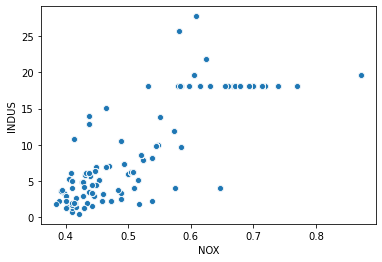

In [9]:
sns.scatterplot(x="NOX", y="INDUS",
            data=boston_df,)

it can be said that Nitric Ocide conentrations has positive linear relationship with Proportion of Non-Retail Businees acres per town

# Histogram of Pupil to teacher ratio

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <a list of 10 Patch objects>)

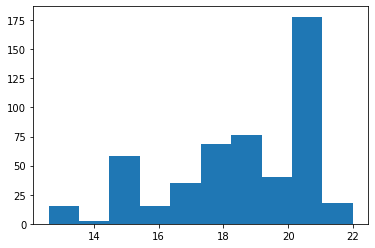

In [10]:
plt.hist(boston_df['PTRATIO'])

# Is there a significant difference in median value of houses bounded by the Charles river or not? 
## Set the Hypothesis

$H_0$ : There is no significant difference in median value of houses between bounded by the Charles river and not <br>
$H_1$ : There is a significant difference in median value of houses between bounded by the Charles river and not

We use alpha = 0.05

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

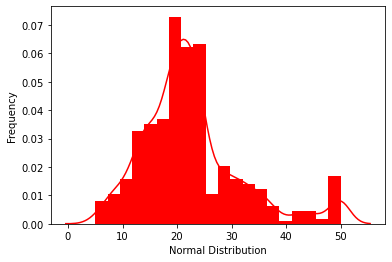

In [11]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

First, use the Levene's Test in Python to check test significance

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

From Levene's test, we findout that median value of houses between bounded by the Charles river and not, has unequal variance.

Next, we use T-test with unequal variance to test the hypothesis

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

# Conclusion
Because pvalue < alpha (0.05) then we reject our null hypothesis. It means that There is a difference median value of houses between bounded by Charles river and not.

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) ?

## Set the Hypothesis

We are going use ANOVA the we group the age based
- 35 Years and younger
- Between 35 Years and 70 Years
- 70 Years and older

$H_0$ : All population mean equal  <br>
$H_1$ : There is a difference in median value of houses between at least one of the group 

We use alpha = 0.05

Test the equality of variance

In [14]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Because pvalue > 0.05 then variance is equal

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'], 
                                            boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                                            boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


# Conclusion
Because P-Value < alpha(0.05) then $H_0$ is rejected. it means there is difference in Median Value of House between at least one of the group

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

## State the hypothesis

$H_0$ : There is no relationship betwwn Nitric oxide concentrations and proportion of non-retail business acres per town <br>
$H_1$ : There is a relationship betwwn Nitric oxide concentrations and proportion of non-retail business acres per town

alpha = 0.05


In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

# Conclusion
Since P-Value < 0.05, $H_0$ is rejected. It means that there is a relationship betwwn Nitric oxide concentrations and proportion of non-retail business acres per town.

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

## Hypothesis

$H_0$ : There is no impact between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes<br>
$H_1$ : There is a impact between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

alpha = 0.05


In [17]:
boston_df['DIS']

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64

In [18]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           1.21e-08
Time:                        09:12:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion
Because P-Value is less then 0.05 then $H_0$ is rejected. It means there is a impact between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 

The impact is for each additional weighted distance there is 1.09 (in $1000's) increment for median value of owner occupoed homes.